## 1. 라이브러리 가져오기
## Import Library

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [2]:
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

font_location = 'C:/Windows/Fonts/H2GTRM.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
mpl.rc('font', family=font_name)

mpl.rcParams['axes.unicode_minus'] = False

In [3]:
import os
os.chdir("C:/Users/kim98/Desktop")
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', None)
import warnings
warnings.filterwarnings('ignore')

In [4]:
from itertools import product

In [5]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from skopt  import BayesSearchCV 

In [8]:
print('Pandas : %s'%(pd.__version__))
print('Numpy : %s'%(np.__version__))
print('Scikit-Learn : %s'%(sklearn.__version__))
!python --version

Pandas : 0.24.2
Numpy : 1.16.4
Scikit-Learn : 0.21.2
Python 3.7.3


## 2. 데이터 전처리
## Data Cleansing & Pre-Processing  

In [9]:
def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [10]:
# 날짜 처리
data = pd.read_csv('C:/Users/kim98/Desktop/201901-202003.csv')
data = data.fillna('')
data['year'] = data['REG_YYMM'].apply(lambda x: grap_year(x))
data['month'] = data['REG_YYMM'].apply(lambda x: grap_month(x))
# data = data.drop(['REG_YYMM'], axis=1)

CARD_SIDO_NM : 카드이용지역_시도 (가맹점 주소 기준)

CARD_CCG_NM	: 카드이용지역_시군구 (가맹점 주소 기준)

STD_CLSS_NM	: 업종명

HOM_SIDO_NM : 거주지역_시도 (고객 집주소 기준)

HOM_CCG_NM : 거주지역_시군구 (고객 집주소 기준)

AGE : 연령대

SEX_CTGO_CD : 성별 (1: 남성, 2: 여성)

FLC : 가구생애주기 (1: 1인가구, 2: 영유아자녀가구, 3: 중고생자녀가구, 4: 성인자녀가
구, 5: 노년가구)

CSTMR_CNT : 이용고객수 (명)

AMT : 이용금액 (원)

CNT : 이용건수 (건)

year : 연

month : 월

# 변수 추가

In [22]:
df = pd.merge(pd.DataFrame(data['CARD_SIDO_NM'].value_counts()),pd.DataFrame(data['HOM_SIDO_NM'].value_counts()), left_index = True, right_index = True, how = 'left')
df1 = pd.DataFrame(df['CARD_SIDO_NM'] > df['HOM_SIDO_NM'])
df1['CARD_SIDO_NM'] = df.index
df1[0] = df1[0].astype(int)
data1 = pd.merge(data, df1, how = 'inner', on = 'CARD_SIDO_NM')
data1.rename(columns = {0:'In'}, inplace = True)
data1.head()

# In : card sido가 더 많은 지역 1로, hom sido가 더 많은 지역 0으로

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,year,month,AMT_per_people,AMT_per_count,In
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4,2019,1,77800.0,77800.0,1
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8,2019,1,196357.1,171812.5,1
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6,2019,1,136450.0,136450.0,1
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5,2019,1,429250.0,343400.0,1
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3,2019,1,349100.0,349100.0,1


In [20]:
df1 = data[['CARD_SIDO_NM','STD_CLSS_NM','AGE']].groupby(['CARD_SIDO_NM','STD_CLSS_NM']).agg(pd.Series.mode)
df1.reset_index(inplace = True)



AGE
CARD_SIDO_NM STD_CLSS_NM                      
강원           건강보조식품 소매업                    50s
             골프장 운영업                       50s
             과실 및 채소 소매업                   50s
             관광 민예품 및 선물용품 소매업             50s
             그외 기타 분류안된 오락관련 서비스업          40s
             그외 기타 스포츠시설 운영업               50s
             그외 기타 종합 소매업                  50s
             기타 대형 종합 소매업                  30s
             기타 수상오락 서비스업                  20s
             기타 외국식 음식점업                   20s
             기타 주점업                        50s
             기타음식료품위주종합소매업                 50s
             내항 여객 운송업                     50s
             마사지업                          40s
             면세점                    [40s, 50s]
             버스 운송업                        50s
             비알콜 음료점업                      20s
             빵 및 과자류 소매업                   20s
             서양식 음식점업                      20s
             수산물 소매업                       50s
             슈퍼마켓                          40s
             스포츠 및 레크레이션 용품 임대업            40s
             여관업                           50s
             여행사업                          40s
             욕탕업                           50s
             육류 소매업                        40s
             일반유흥 주점업                      40s
             일식 음식점업                       50s
             자동차 임대업                       20s
             전시 및 행사 대행업                   40s
...                                        ...
충북           기타 주점업                        50s
             기타음식료품위주종합소매업                 50s
             내항 여객 운송업                     50s
             마사지업                          50s
             면세점                           50s
             버스 운송업                        40s
             비알콜 음료점업                      20s
             빵 및 과자류 소매업                   40s
             서양식 음식점업                      20s
             수산물 소매업                       40s
             슈퍼마켓                          40s
             스포츠 및 레크레이션 용품 임대업            40s
             여관업                           50s
             여행사업                          20s
             욕탕업                           40s
             육류 소매업                        40s
             일반유흥 주점업                      40s
             일식 음식점업                       40s
             자동차 임대업                       20s
             전시 및 행사 대행업                   40s
             중식 음식점업                       40s
             차량용 가스 충전업                    40s
             차량용 주유소 운영업                   40s
             체인화 편의점                       20s
             택시 운송업                        20s
             피자 햄버거 샌드위치 및 유사 음식점업         20s
             한식 음식점업                       40s
             호텔업                           60s
             화장품 및 방향제 소매업                 40s
             휴양콘도 운영업                      40s

[650 rows x 1 columns]

In [ ]:
data.groupby(['Country','City'])['Short name'].agg(pd.Series.mode).to_frame()

In [18]:
df = pd.merge(pd.DataFrame(data['CARD_SIDO_NM'].value_counts()),pd.DataFrame(data['HOM_SIDO_NM'].value_counts()), left_index = True, right_index = True, how = 'left')
df1 = pd.DataFrame(df['CARD_SIDO_NM'] > df['HOM_SIDO_NM'])
df1['CARD_SIDO_NM'] = df.index
df1[0] = df1[0].astype(int)

sub = pd.read_csv('C:/Users/kim98/Desktop/submission.csv')
data1 = pd.merge(sub, df1, how = 'inner', on = 'CARD_SIDO_NM')
data1.rename(columns = {0:'In'}, inplace = True)
data1.head()

,id,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT,In
0,0,202004,강원,건강보조식품 소매업,0,1
1,1,202004,강원,골프장 운영업,0,1
2,2,202004,강원,과실 및 채소 소매업,0,1
3,3,202004,강원,관광 민예품 및 선물용품 소매업,0,1
4,4,202004,강원,그외 기타 분류안된 오락관련 서비스업,0,1


In [23]:
data1 = data1.drop(columns = ['CARD_CCG_NM', 'HOM_CCG_NM'], axis = 1)

In [24]:
data1.to_csv('C:/Users/kim98/Desktop/rev.csv', sep = ',', header = True, encoding = 'euc-kr')

# 여기부터

In [36]:
data = pd.read_csv('C:/Users/kim98/Desktop/rev.csv', encoding = 'euc-kr')
data = data.drop('Unnamed: 0', axis=1)

In [37]:
data.head()

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,year,month,In
0,강원,건강보조식품 소매업,강원,20s,1,1,4,311200,4,2019,1,1
1,강원,건강보조식품 소매업,강원,30s,1,2,7,1374500,8,2019,1,1
2,강원,건강보조식품 소매업,강원,30s,2,2,6,818700,6,2019,1,1
3,강원,건강보조식품 소매업,강원,40s,1,3,4,1717000,5,2019,1,1
4,강원,건강보조식품 소매업,강원,40s,1,4,3,1047300,3,2019,1,1


In [38]:
cat_features = ['CARD_SIDO_NM','STD_CLSS_NM','HOM_SIDO_NM','SEX_CTGO_CD','FLC','AGE','In','year','month']

for i in enumerate (cat_features) :
    ca = i[1]
    data[ca] = data[ca].astype('category')

# CARD_SIDO_NM, STD_CLSS_NM별 AMT 합으로 시계열성 확인

In [8]:
df = pd.read_csv('C:/Users/kim98/Desktop/201901-202003.csv')

In [37]:
df['REG_YYMM'] = df['REG_YYMM'].astype('category')

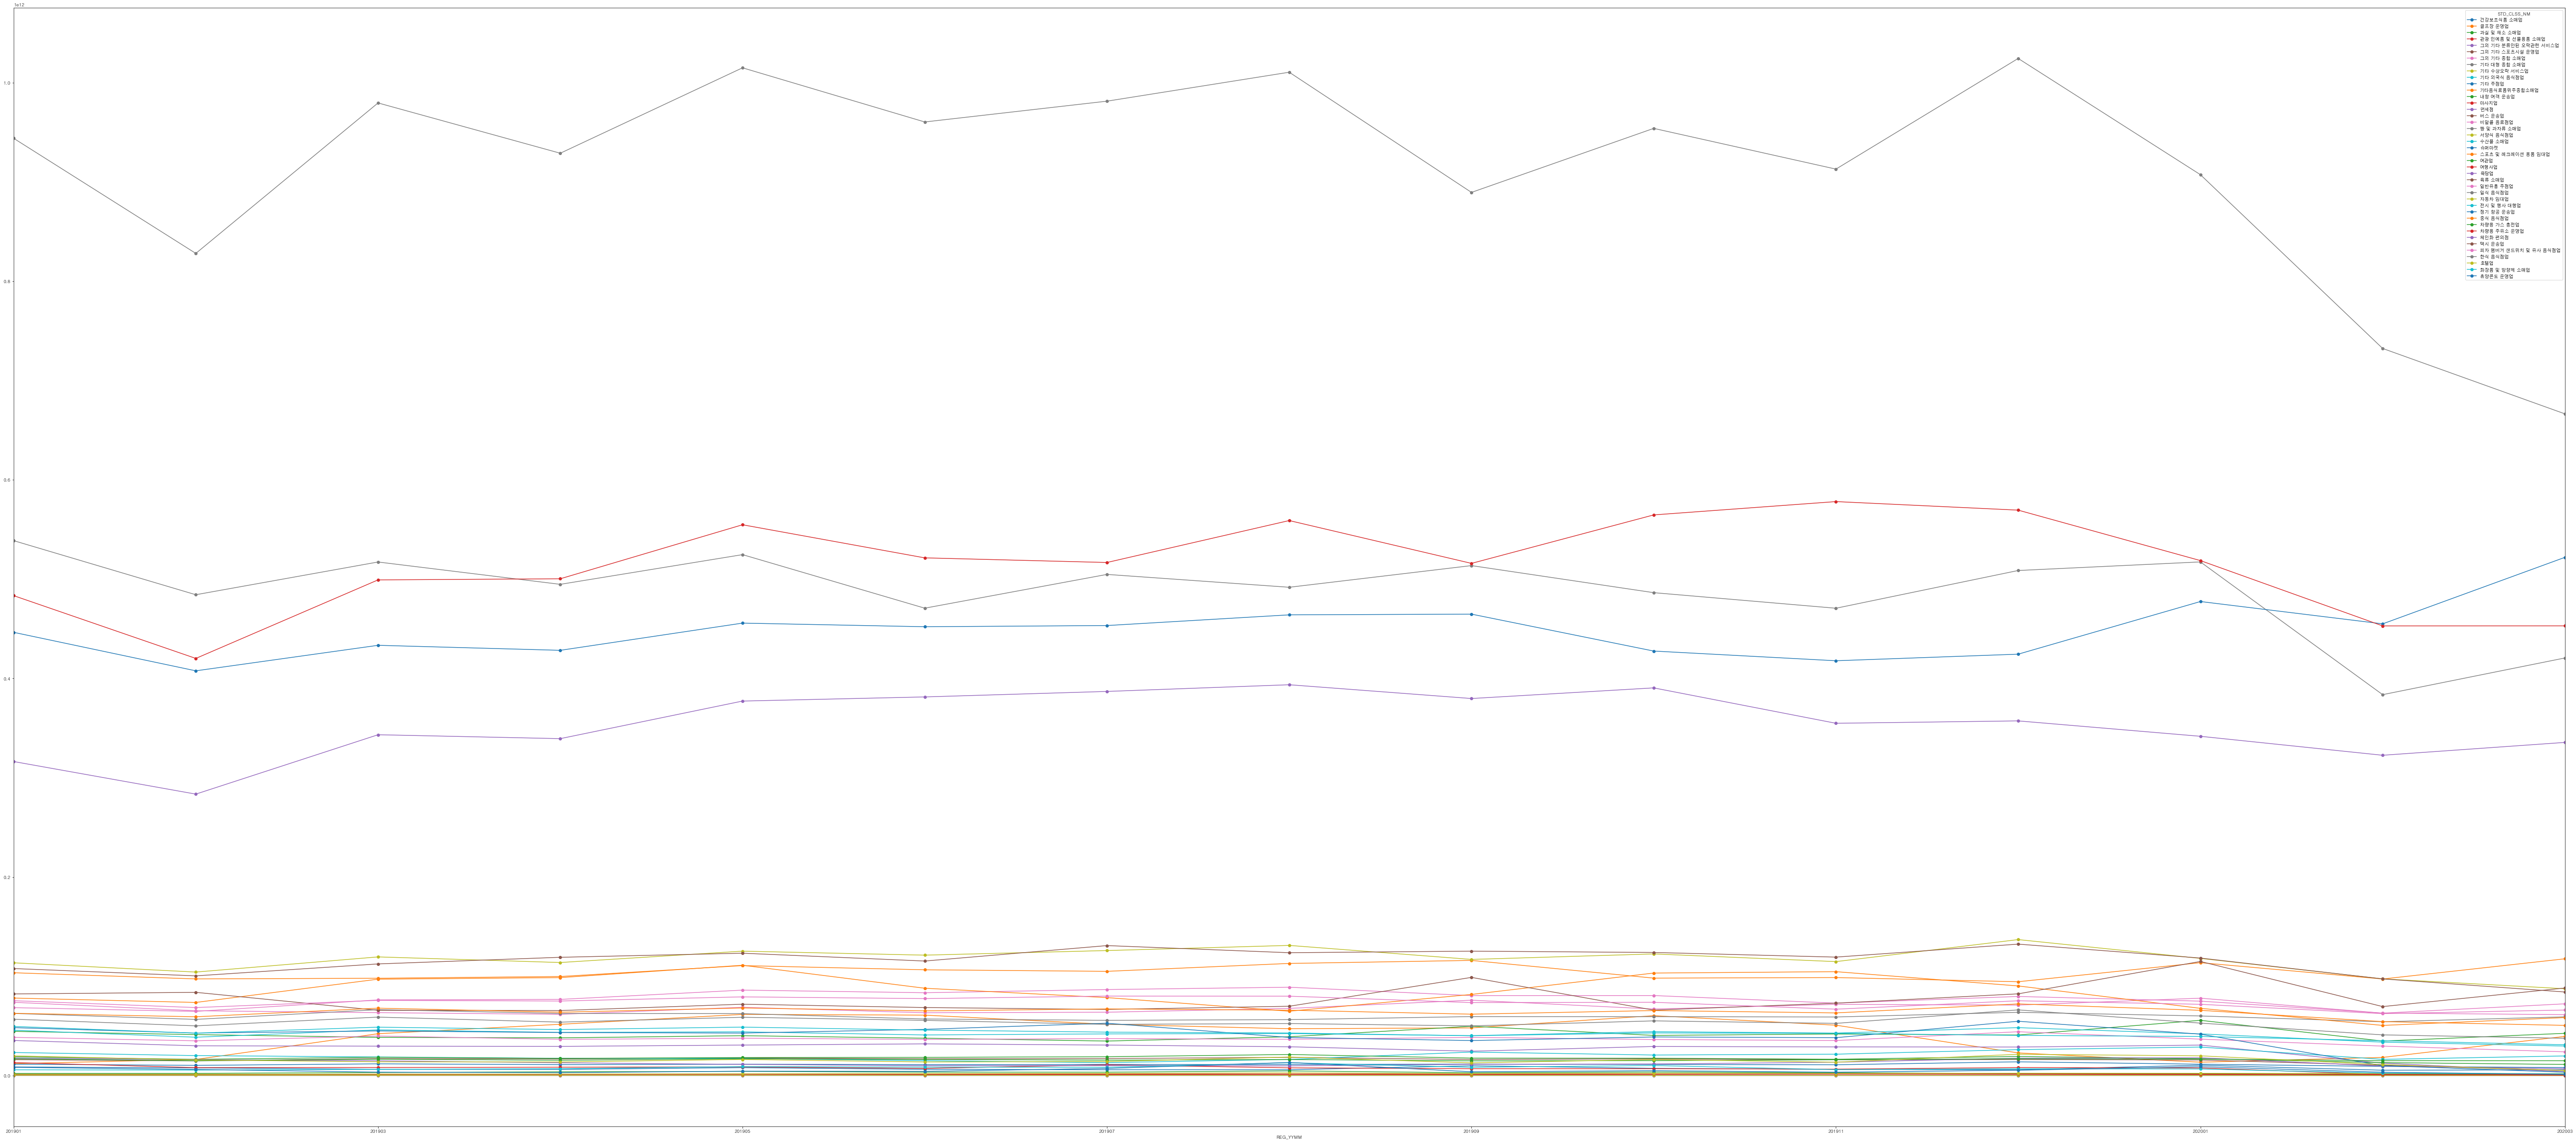

In [39]:
fig, ax = plt.subplots(figsize=(100,45))
df[['STD_CLSS_NM','AMT','REG_YYMM']].groupby(['REG_YYMM','STD_CLSS_NM']).sum()['AMT'].unstack().plot(ax = ax, marker = 'o')

## 5. 모델 학습 및 검증
## Model Tuning & Evaluation

In [39]:
# feature, target 설정
train_num = data.sample(frac=1, random_state=0)

train_features = train_num.drop(['AMT','CNT','CSTMR_CNT'], axis=1)
train_target = np.log1p(train_num['AMT'])

In [ ]:
import lightgbm as lgb
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import accuracy_score,confusion_matrix

def lgb_evaluate(LearningRate, NEstimators, NumLeaves, MaxDepth, MinChildWeight, MinChildSamples, MinSplitGain, Subsample):
    reg=lgb.LGBMRegressor(learning_rate = LearningRate,
                          n_estimators = int(NEstimators),
                          num_leaves = int(NumLeaves),
                          max_depth = int(MaxDepth),
                          min_child_weight = MinChildWeight,
                          min_child_samples = int(MinChildSamples),
                          min_split_gain = MinSplitGain,
                          subsample = Subsample)
#   scores = cross_val_score(reg, train_x, train_y, cv=5, scoring='roc_auc')
    scores = cross_val_score(reg, train_features, train_target, cv=5, scoring='neg_mean_squared_error')
    return np.mean(scores)
def bayesOpt(x_train, y_train):
    lgbBO = BayesianOptimization(lgb_evaluate, {'LearningRate': (0.01, 1.0),
                                                'NEstimators': (50, 200),
                                                'NumLeaves':  (5, 90),
                                                'MaxDepth': (1, 50),
                                                'MinChildWeight': (0.001, 10),
                                                'MinChildSamples': (10,70),
                                                'MinSplitGain': (0.0, 1.0),
                                                'Subsample': (0.01, 1.0),
#                                                 'boosting_type': 'gbdt',
#                                                 'objective': 'tweedie'
                                            })
    lgbBO.maximize(init_points=5, n_iter=25)
    print(lgbBO.res)
    
bayesOpt(train_features, train_target)    

|   iter    |  target   | Learni... | MaxDepth  | MinChi... | MinChi... | MinSpl... | NEstim... | NumLeaves | Subsample |
-------------------------------------------------------------------------------------------------------------------------
|  1        | -1.818    |  0.6188   |  23.74    |  63.99    |  3.702    |  0.6759   |  83.19    |  29.45    |  0.8289   |
|  2        | -1.834    |  0.2907   |  19.08    |  43.44    |  3.731    |  0.1429   |  85.09    |  30.51    |  0.5125   |
|  3        | -1.89     |  0.1023   |  40.6     |  41.96    |  8.115    |  0.08255  |  77.67    |  68.22    |  0.1297   |
|  4        | -1.809    |  0.4827   |  38.42    |  31.95    |  7.107    |  0.6022   |  58.74    |  69.36    |  0.5911   |
|  5        | -1.82     |  0.6826   |  43.33    |  66.96    |  9.391    |  0.9223   |  164.7    |  12.59    |  0.2664   |
|  6        | -1.977    |  1.0      |  50.0     |  10.0     |  10.0     |  1.0      |  50.0     |  5.0      |  1.0      |
|  7        | -2.536    

In [16]:
params = {
            'learning_rate' : 0.05,
            'boosting_type': 'gbdt',
            'objective': 'tweedie',
            'tweedie_variance_power': 1.1,
            'metric': 'rmse',
            'sub_row' : 0.75,
            'lambda_l2' : 0.1
        }

In [17]:
model = lgb.train(params,
                  train_data,
                  1000,
                  val_data,
                  verbose_eval = 100,
                  early_stopping_rounds = 100
                 )

Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 1.47779
[200]	valid_0's rmse: 1.43666
[300]	valid_0's rmse: 1.41508
[400]	valid_0's rmse: 1.40049
[500]	valid_0's rmse: 1.39141
[600]	valid_0's rmse: 1.38442
[700]	valid_0's rmse: 1.37755
[800]	valid_0's rmse: 1.3726
[900]	valid_0's rmse: 1.36881
[1000]	valid_0's rmse: 1.36556
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 1.36556


# LGBM

In [11]:
model_LGBM = LGBMRegressor(
                         learning_rate = 0.5898,
                      max_depth = 49,
                      min_child_weight = 0.3068,
                      min_child_samples = 69,
                      min_split_gain = 0.1254,
                       n_estimators = 198,
                      num_leaves = 86,
                      subsample = 0.5631
                         )

model_LGBM.fit(train_features, train_target)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.5898, max_depth=49,
              min_child_samples=69, min_child_weight=0.3068,
              min_split_gain=0.1254, n_estimators=198, n_jobs=-1, num_leaves=86,
              objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=0.5631, subsample_for_bin=200000,
              subsample_freq=0)

# XGBoost

In [13]:
model_XGB = XGBRegressor()

model_XGB.fit(train_features, train_target)

[14:55:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:55:55] WARNING: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


OSError: [WinError -529697949] Windows Error 0xe06d7363

# Random Forest

In [16]:
# 훈련
model_RF = RandomForestRegressor(n_jobs=-1, random_state=0)
model_RF.fit(train_features, train_target)

MemoryError: 

# 지수이동평균

In [10]:
data.head()

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,year,month,AMT_per_people,AMT_per_count,In
0,201901,강원,건강보조식품 소매업,강원,20s,1,1,4,311200,4,2019,1,77800.0,77800.0,1
1,201901,강원,건강보조식품 소매업,강원,30s,1,2,7,1374500,8,2019,1,196357.1,171812.5,1
2,201901,강원,건강보조식품 소매업,강원,30s,2,2,6,818700,6,2019,1,136450.0,136450.0,1
3,201901,강원,건강보조식품 소매업,강원,40s,1,3,4,1717000,5,2019,1,429250.0,343400.0,1
4,201901,강원,건강보조식품 소매업,강원,40s,1,4,3,1047300,3,2019,1,349100.0,349100.0,1


In [65]:
df = pd.DataFrame(data[['REG_YYMM','CARD_SIDO_NM','STD_CLSS_NM','AMT']].groupby(['REG_YYMM','CARD_SIDO_NM','STD_CLSS_NM']).sum()['AMT'])
df.reset_index(inplace = True)
df = df.set_index('REG_YYMM')

df.head()

,CARD_SIDO_NM,STD_CLSS_NM,AMT
REG_YYMM,,,
201901,강원,건강보조식품 소매업,148354746
201901,강원,골프장 운영업,1229200312
201901,강원,과실 및 채소 소매업,1286979106
201901,강원,관광 민예품 및 선물용품 소매업,30656770
201901,강원,그외 기타 스포츠시설 운영업,13101500


In [72]:
def make_ewm_arr(data_frame, span_num):
    arr_ewm = np.array([])
    for i in df.CARD_SIDO_NM.unique():
        for j in df.STD_CLSS_NM.unique():
            df_set = data_frame[(data_frame.CARD_SIDO_NM == i)&(data_frame.STD_CLSS_NM == j)]
            # 여기에서 지정하는 span값은 위 수식에서 N에 해당한다.
            arr_ewm = np.concatenate((arr_ewm, df_set.AMT.ewm(span=span_num).mean().values))
    
    return arr_ewm

In [75]:
ewm_month = df.copy()

ewm_month['AMT_3ewm'] = make_ewm_arr(df, 3)
ewm_month['AMT_4ewm'] = make_ewm_arr(df, 6)


In [76]:
ewm_month.head()

,CARD_SIDO_NM,STD_CLSS_NM,AMT,AMT_3ewm,AMT_4ewm
REG_YYMM,,,,,
201901,강원,건강보조식품 소매업,148354746,1.483547e+08,1.483547e+08
201901,강원,골프장 운영업,1229200312,1.472622e+08,1.473987e+08
201901,강원,과실 및 채소 소매업,1286979106,1.256489e+08,1.303343e+08
201901,강원,관광 민예품 및 선물용품 소매업,30656770,1.154620e+08,1.211467e+08
201901,강원,그외 기타 스포츠시설 운영업,13101500,1.323156e+08,1.306121e+08


In [ ]:
def make_minus_rolling(data_frame, rolling_num):
    def minus_shift_rolling(df_num, num):
        a = np.average(df_num.values[-num:])
        b = np.average(np.append(df_set.values[-(num-1):], a))
        if num > 2:
            c = np.average(np.append(np.append(df_set.values[-(num-2):], a), b))
        else:
            c = np.average((a, b))
        return np.sum((a, b, c))

    minus_rolling_arr = np.array([])
    for i in data_frame.store_id.unique():
        df_set = pd.DataFrame(data_frame[data_frame.store_id == i].amount)
        minus_rolling_arr = np.concatenate((minus_rolling_arr, np.array([minus_shift_rolling(df_set, rolling_num)])))
        
    df_rolling = pd.DataFrame({'store_Id' : df_sub.store_id, 'amount' : minus_rolling_arr})
    
    return df_rolling

## 6. 결과 및 결언
## Conclusion & Discussion

In [12]:
CARD_SIDO_NMs = train_num['CARD_SIDO_NM'].unique()
STD_CLSS_NMs  = train_num['STD_CLSS_NM'].unique()
HOM_SIDO_NMs  = train_num['HOM_SIDO_NM'].unique()
AGEs          = train_num['AGE'].unique()
SEX_CTGO_CDs  = train_num['SEX_CTGO_CD'].unique()
FLCs          = train_num['FLC'].unique()
Ins = train_num['In'].unique()
years         = [2020]
months        = [4, 7]

In [13]:
train_features.columns

Index(['CARD_SIDO_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM', 'AGE', 'SEX_CTGO_CD',
       'FLC', 'year', 'month', 'In'],
      dtype='object')

In [14]:
comb_list = [CARD_SIDO_NMs, STD_CLSS_NMs, HOM_SIDO_NMs, AGEs, SEX_CTGO_CDs, FLCs, years, months, Ins]
temp = np.array(list(product(*comb_list)))
temp = pd.DataFrame(data=temp, columns=train_features.columns)

In [22]:
temp = temp.drop(['AMT'], axis=1)

In [24]:
cat_features = ['CARD_SIDO_NM','STD_CLSS_NM','HOM_SIDO_NM','SEX_CTGO_CD','FLC','AGE','In','year','month']

for i in enumerate (cat_features) :
    ca = i[1]
    temp[ca] = temp[ca].astype('category')

In [26]:
# 예측_LGBM
pred = model_LGBM.predict(temp)
pred = np.expm1(pred)

cat_features = ['year','month']

for i in enumerate (cat_features) :
    ca = i[1]
    temp[ca] = temp[ca].astype('float')

temp['AMT'] = np.round(pred, 0)
temp['REG_YYMM'] = temp['year']*100 + temp['month']
temp = temp[['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]
temp = temp.groupby(['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM']).sum().reset_index(drop=False)

In [ ]:
# 디코딩 
temp['CARD_SIDO_NM'] = encoders['CARD_SIDO_NM'].inverse_transform(temp['CARD_SIDO_NM'])
temp['STD_CLSS_NM'] = encoders['STD_CLSS_NM'].inverse_transform(temp['STD_CLSS_NM'])

In [27]:
# 제출 파일 만들기
submission = pd.read_csv('C:/Users/kim98/Desktop/submission.csv', index_col=0)
submission = submission.drop(['AMT'], axis=1)
submission = submission.merge(temp, left_on=['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM'], right_on=['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM'], how='left')
submission.index.name = 'id'
submission.to_csv('C:/Users/kim98/Desktop/submission_model_LGBM.csv', encoding='utf-8-sig')
submission.head()

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
id,,,,
0,202004,강원,건강보조식품 소매업,298692480.0
1,202004,강원,골프장 운영업,517906960.0
2,202004,강원,과실 및 채소 소매업,170965400.0
3,202004,강원,관광 민예품 및 선물용품 소매업,114414840.0
4,202004,강원,그외 기타 분류안된 오락관련 서비스업,125667100.0


In [ ]:
# 예측_XGB
pred = model_XGB.predict(temp)
pred = np.expm1(pred)
temp['AMT'] = np.round(pred, 0)
temp['REG_YYMM'] = temp['year']*100 + temp['month']
temp = temp[['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]
temp = temp.groupby(['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM']).sum().reset_index(drop=False)

In [ ]:
# 디코딩 
temp['CARD_SIDO_NM'] = encoders['CARD_SIDO_NM'].inverse_transform(temp['CARD_SIDO_NM'])
temp['STD_CLSS_NM'] = encoders['STD_CLSS_NM'].inverse_transform(temp['STD_CLSS_NM'])

In [ ]:
# 제출 파일 만들기
submission = pd.read_csv('C:/Users/kim98/Desktop/submission.csv', index_col=0)
submission = submission.drop(['AMT'], axis=1)
submission = submission.merge(temp, left_on=['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM'], right_on=['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM'], how='left')
submission.index.name = 'id'
submission.to_csv('C:/Users/kim98/Desktop/submission_model_XGB.csv', encoding='utf-8-sig')
submission.head()

In [ ]:
# 예측_RF
pred = model_RF.predict(temp)
pred = np.expm1(pred)
temp['AMT'] = np.round(pred, 0)
temp['REG_YYMM'] = temp['year']*100 + temp['month']
temp = temp[['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]
temp = temp.groupby(['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM']).sum().reset_index(drop=False)

In [ ]:
# 디코딩 
temp['CARD_SIDO_NM'] = encoders['CARD_SIDO_NM'].inverse_transform(temp['CARD_SIDO_NM'])
temp['STD_CLSS_NM'] = encoders['STD_CLSS_NM'].inverse_transform(temp['STD_CLSS_NM'])

In [ ]:
# 제출 파일 만들기
submission = pd.read_csv('C:/Users/kim98/Desktop/submission.csv', index_col=0)
submission = submission.drop(['AMT'], axis=1)
submission = submission.merge(temp, left_on=['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM'], right_on=['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM'], how='left')
submission.index.name = 'id'
submission.to_csv('C:/Users/kim98/Desktop/submission_model_RF.csv', encoding='utf-8-sig')
submission.head()

In [21]:
# df = data.copy()
# df = df[['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]
# df = df.groupby(['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM']).sum().reset_index(drop=False)
# df = df.loc[df['REG_YYMM']==202003]
# df = df[['CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]

submission = pd.read_csv('C:/Users/kim98/Desktop/submission.csv', index_col=0)
submission = submission.loc[submission['REG_YYMM']==202004]
submission = submission[['CARD_SIDO_NM', 'STD_CLSS_NM']]
submission = submission.merge(data, left_on=['CARD_SIDO_NM', 'STD_CLSS_NM'], right_on=['CARD_SIDO_NM', 'STD_CLSS_NM'], how='left')
AMT = list(np.expm1(np.log1p(submission.AMT.values+1)))*2

submission = pd.read_csv('C:/Users/kim98/Desktop/submission.csv', index_col=0)
submission['AMT'] = AMT
submission.to_csv('C:/Users/kim98/Desktop/submission5.csv', encoding='utf-8-sig')
submission.head()

ValueError: Length of values does not match length of index

In [63]:
submission.to_csv('C:/Users/kim98/Desktop/submission4.csv', encoding='utf-8-sig')